In [278]:
import pickle

# print current working directory
import os
print('os.getcwd():', os.getcwd())

os.getcwd(): /root/workspace/VectorMapNet_code


In [279]:
with open('./work_dirs/vectormapnet_ld/result_ld.pkl', 'rb') as f:
    results = pickle.load(f)

results.keys()

dict_keys(['meta', 'results', 'groundTruth'])

In [280]:
results['meta']

{'use_camera': False,
 'use_lidar': True,
 'use_radar': False,
 'use_map': False,
 'use_external': False}

In [281]:
type(results['results'])
results['results'].keys()

dict_keys(['vectors'])

In [282]:
results.keys()
results['groundTruth'].keys()
results['groundTruth']['vectors'].__len__()

35

In [283]:
vectors = results['groundTruth']['vectors']
# print('vectors:', vectors)
print('len: ', len(vectors))
vectors[0].keys()


len:  35


dict_keys(['pts', 'pts_num', 'type', 'confidence_level'])

In [284]:
len(vectors[0]['pts'])

4

In [285]:
vectors[0]

{'pts': array([[40.10050251, 40.10050251],
        [41.00502513, 37.38693467],
        [50.65326633, 40.70351759],
        [52.16080402, 39.49748744]]),
 'pts_num': 4,
 'type': 1,
 'confidence_level': 1.0}

In [286]:
import matplotlib.pyplot as plt
import numpy as np

In [287]:
color_map = {
    0: 'r',
    1: 'g',
    2: 'b',
}

close_map = {
    0: True,
    1: False,
    2: False,
}

1.0


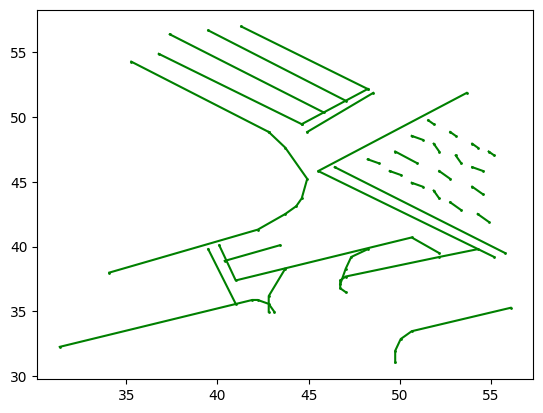

In [288]:
# plot a list of 2D points (x, y), the input is a ndarray of shape (N, 2)
# connect the points in the order of the list

def plot_points(points, color='b', marker='o', s=1, close = True):

    # points: ndarray of shape (N, 2)

    plt.scatter(points[:, 0], points[:, 1], c=color, marker=marker, s=s)
    plt.plot(points[:, 0], points[:, 1], c=color)

    # connect the first and last points
    if close:
        plt.plot([points[0][0], points[-1][0]], [points[0][1], points[-1][1]], c=color)

print(vectors[0]['confidence_level'])
for i in vectors:
    plot_points(i['pts'], color=color_map[i['type']], close=False)


plt.show()

In [289]:
results['groundTruth']
len(results['groundTruth'])

1

In [290]:
# plot a list of 2D points (x, y), the input is a ndarray of shape (N, 2)
# connect the points in the order of the list

def plot_points(points, color='b', marker='o', s=5, close = True):

    # points: ndarray of shape (N, 2)

    plt.scatter(points[:, 0], points[:, 1], c=color, marker=marker, s=s)
    plt.plot(points[:, 0], points[:, 1], c=color)

    # connect the first and last points
    if close:
        plt.plot([points[0][0], points[-1][0]], [points[0][1], points[-1][1]], c=color)

# plot two maps side by side
def plot_two_maps(v1, v2, seq = None):
    fig = plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    for i in v1:
        if i['confidence_level'] < 0.8:
            continue
        plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    plt.subplot(1, 2, 2)
    for i in v2:
        if i['confidence_level'] < 0.8:
            continue
        plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    plt.show()
    if seq is not None:
        plt.savefig('results_nuscence_' + str(seq) + '.png')

def plot_one_map(v):
    fig = plt.figure(figsize=(20, 10))
    for i in v:
        print(i['confidence_level'])
        if i['confidence_level'] < 0.8:
            continue
        plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    plt.show()
    plt.savefig('results_nuscence_test.png', dpi=fig.dpi)

    

# print(vectors[0])


# plot_points(vectors[0])

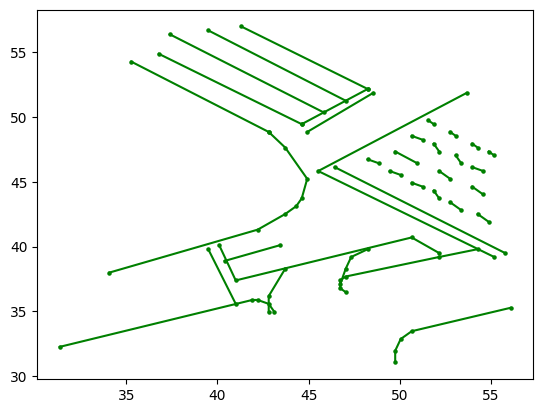

In [291]:

seq = 0
for i in results['groundTruth']['vectors']:
    # fig = plt.figure(figsize=(20, 10))
    plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    seq += 1


70
35
output 35 / 70 vectors


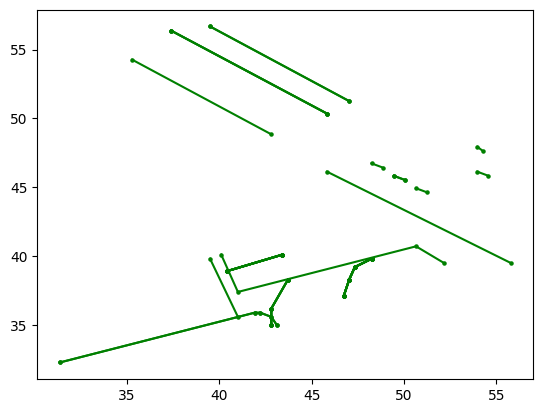

In [292]:
seq = 0
print(len(results['results']['vectors']))
print(len(results['groundTruth']['vectors']))


for i in results['results']['vectors']:
    if i['confidence_level'] < 0.9:
        continue
    # fig = plt.figure(figsize=(20, 10))
    # print(i['confidence_level'])
    plot_points(i['pts'], color=color_map[i['type']], close=close_map[i['type']])
    seq += 1
    
print(f"output {seq} / {len(results['results']['vectors'])} vectors")


output 35 / 70 vectors


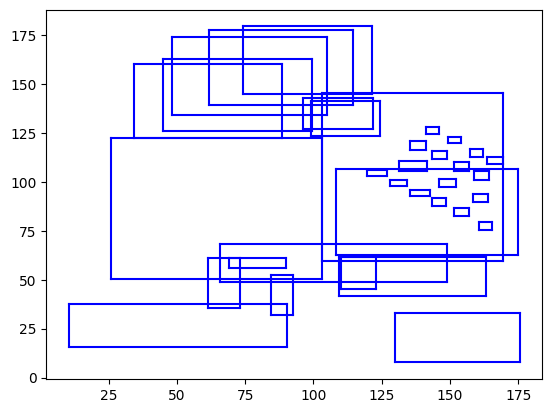

In [293]:
def plot_bbox(bbox, color='b', marker='o', s=5, close = True):
    # bbox: ndarray of shape (x1, y1, x2, y2)
    # draw a rectangle with corners (x1, y1) and (x2, y2)
    
    plt.plot([bbox[0], bbox[2]], [bbox[1], bbox[1]], c=color)
    plt.plot([bbox[0], bbox[2]], [bbox[3], bbox[3]], c=color)
    plt.plot([bbox[0], bbox[0]], [bbox[1], bbox[3]], c=color)
    plt.plot([bbox[2], bbox[2]], [bbox[1], bbox[3]], c=color)
    
    
def plot_det_results(vectors: dict, confidence_level: float = 0.9):
    
    
    count = 0
    for i in vectors:
        if i['confidence_level'] < confidence_level:
            continue
        plot_bbox(i['bbox'])
        count += 1
    print(f"output {count} / {len(vectors)} vectors")
        
        
    

results['results']['vectors'][1]
# plot_bbox(results['results']['vectors'][1]['bbox'])
plot_det_results(results['results']['vectors'], confidence_level=0.9)

[ 74.08283 145.17072 121.55529 179.43903]


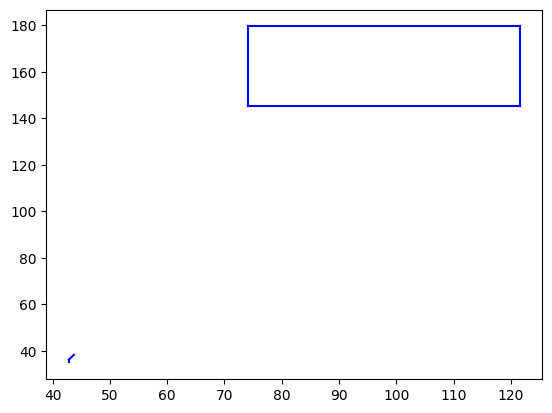

In [294]:
def plot_polyline(vector: dict, do_plot_bbox: bool = False):
    # plot polyline
    for i in range(vector['pts_num'] - 1):
        plt.plot([vector['pts'][i][0], vector['pts'][i+1][0]], [vector['pts'][i][1], vector['pts'][i+1][1]], c='b')
    
    if do_plot_bbox:
        print(vector['bbox'])
        plot_bbox(vector['bbox'])


results['results']['vectors'][1]
plot_polyline(results['results']['vectors'][1], True)

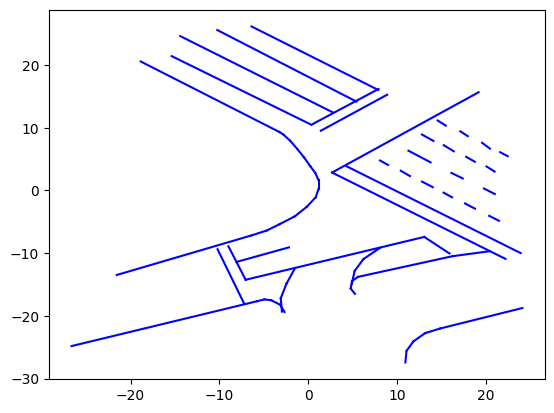

In [295]:
# read the ground truth from pickle file
ann = "/root/workspace/VectorMapNet_code/datasets/RSU/map_info.pkl"

with open(ann, 'rb') as f:
    map_info = pickle.load(f)

for k, v in map_info.items():
    assert k in {"lane", "road_boundary"}
    
    for polyline in v:
        # polyline: array of shape (N, 2)
        for i in range(polyline.shape[0] - 1):
            plt.plot([polyline[i][0], polyline[i+1][0]], [polyline[i][1], polyline[i+1][1]], c='b')
    

{'lane': [array([[ -8.9871769 ,  -8.89525795],
         [ -7.04767895, -14.23590183],
         [ 13.05000782,  -7.40549946],
         [ 15.88898277, -10.04771328]])],
 'road_boundary': [array([[-18.85635757,  20.56835365],
         [ -3.18849468,   9.27957153]])]}

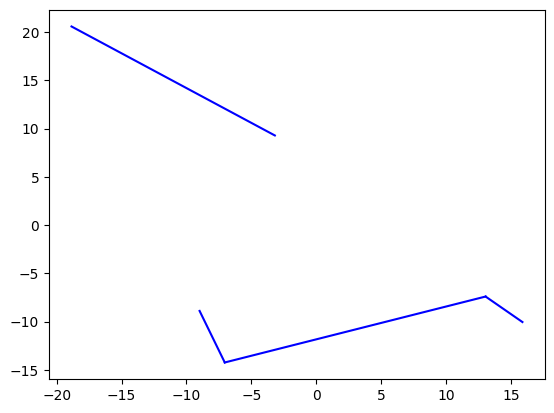

In [296]:
simple_map_info = {}
for k, v in map_info.items():
    
    simple_map_info[k] = [v[0]]

for k, v in simple_map_info.items():
    assert k in {"lane", "road_boundary"}
    
    for polyline in v:
        # polyline: array of shape (N, 2)
        for i in range(polyline.shape[0] - 1):
            plt.plot([polyline[i][0], polyline[i+1][0]], [polyline[i][1], polyline[i+1][1]], c='b')
            
with open("simple_map_info.pkl", 'wb') as f:
    pickle.dump(simple_map_info, f)
    
simple_map_info